# Machine Learning Analysis on Cancer Dataset to Predict Tumor Malignancy

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

## Goal: 
Given a dataset on cancer diagnoses, use 2 machine learning algorithms to classify the tumor types as malignant or benign, and compare the performance of the two models.

## Data Wrangling

In [2]:
# import dataset 
df = pd.read_csv('/Users/CatLeal/Documents/GitHub/DataScience/finalProject/FP_breast_cancer_data_catcol.csv')

In [3]:
# get all possible attributes to be trained on
X_all = df.drop(['target', 'target_category'], axis = 1)

# check correlations between variables with the target to identify potentially useful relationships 
df.corr(numeric_only = True)['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

Attributes that seem to predict the target variable well:
- mean radius
- mean perimeter
- mean area 
- mean concave points
- worst radius
- worst perimeter
- worst concave points

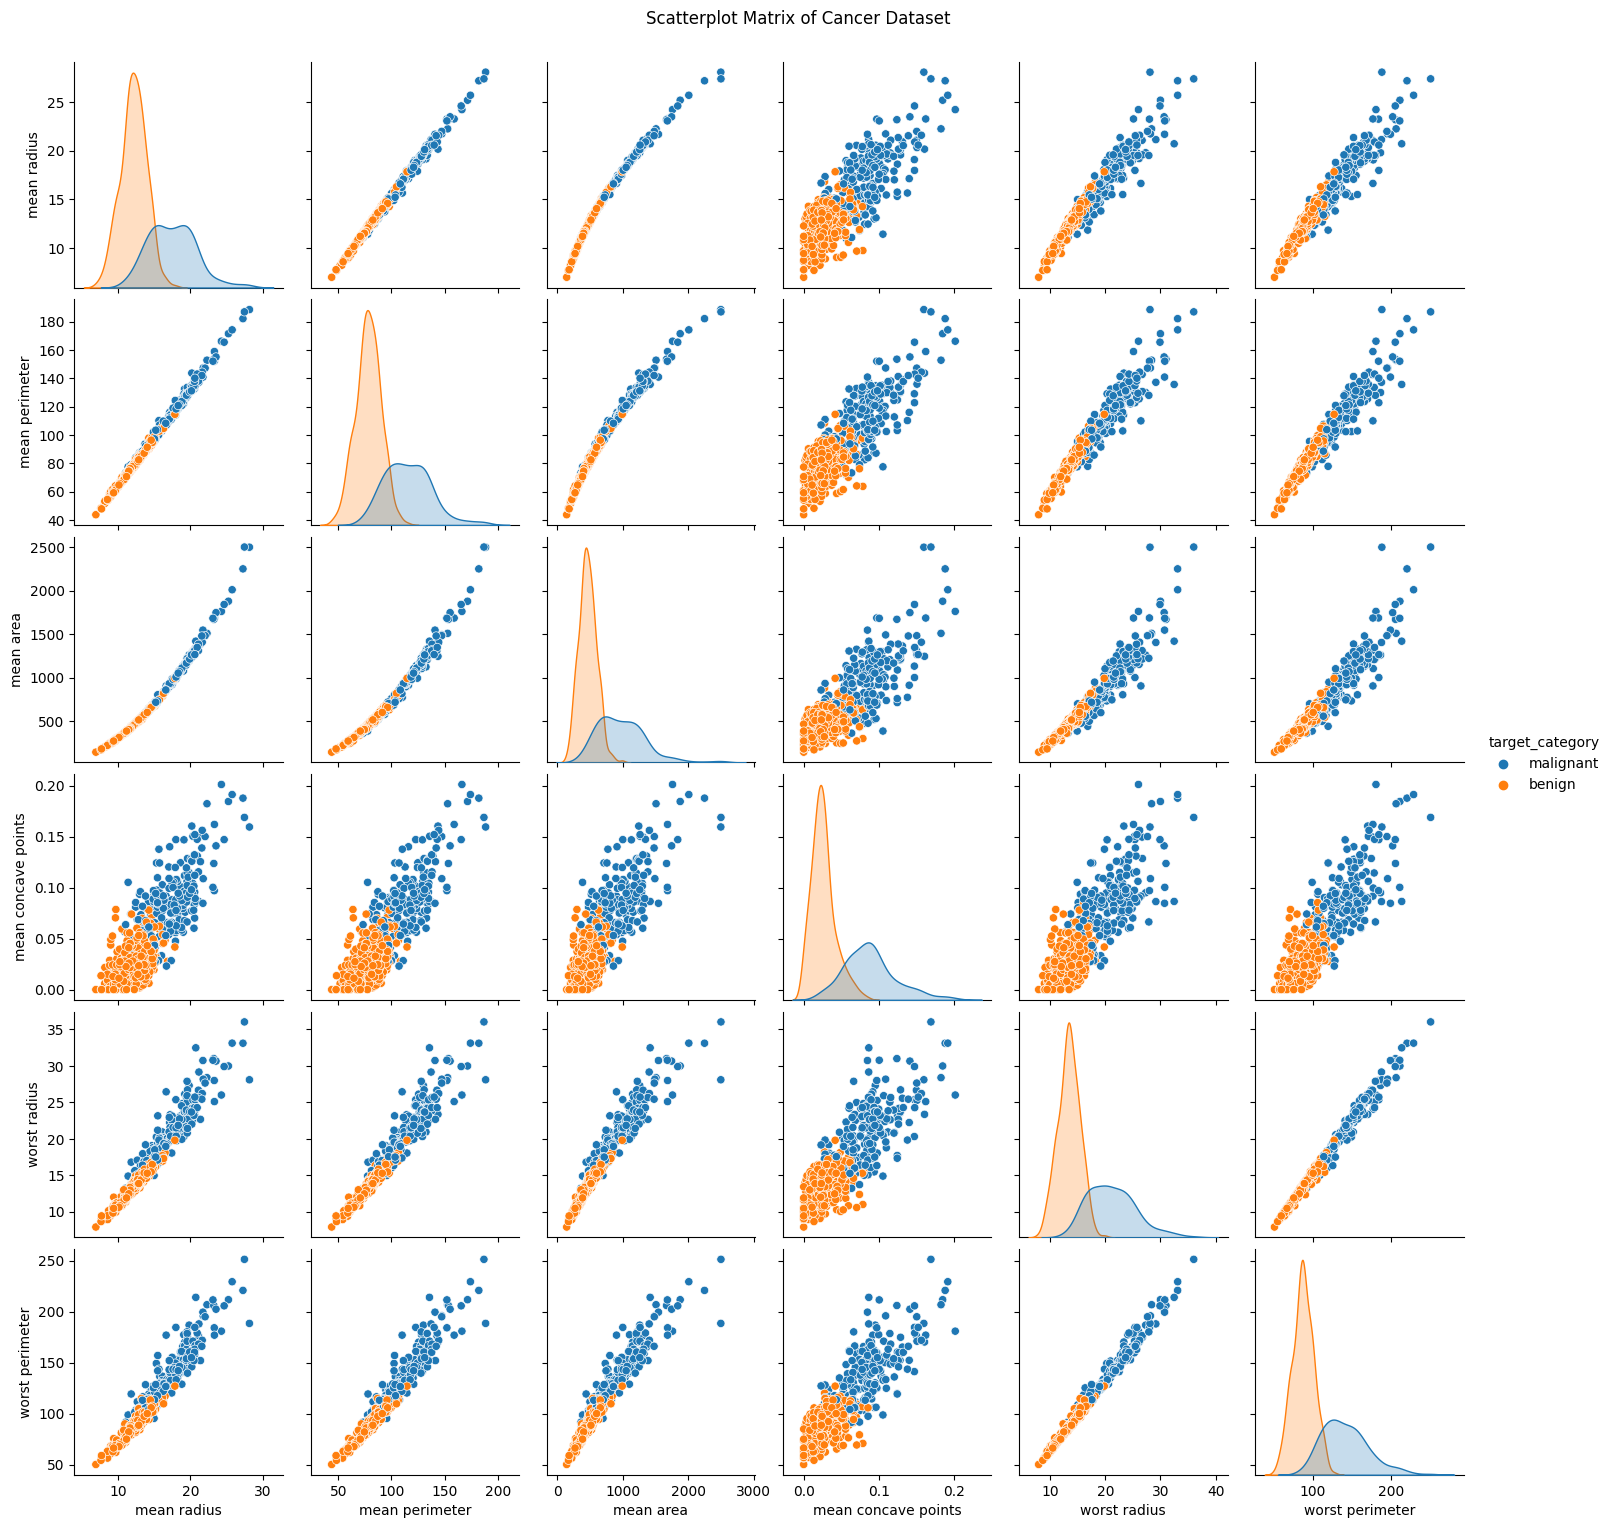

In [4]:
# subset full dataset to only include highly correlated attributes 
df_new = df[['mean radius', 'mean perimeter', 'mean area', 
             'mean concave points', 'worst radius', 'worst perimeter', 
             'target_category']]

# plot attributes against each other to identify useful pairs 
sns.pairplot(df_new, hue = 'target_category')
plt.suptitle("Scatterplot Matrix of Cancer Dataset", y=1.02);

The atrributes I will use to train the algorithms are 'mean concave points' and 'worst perimeter'. 

In [5]:
# separate predictors (X) from the target (y)
X = df[['mean concave points', 'worst perimeter']]
y = df['target']

# split data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

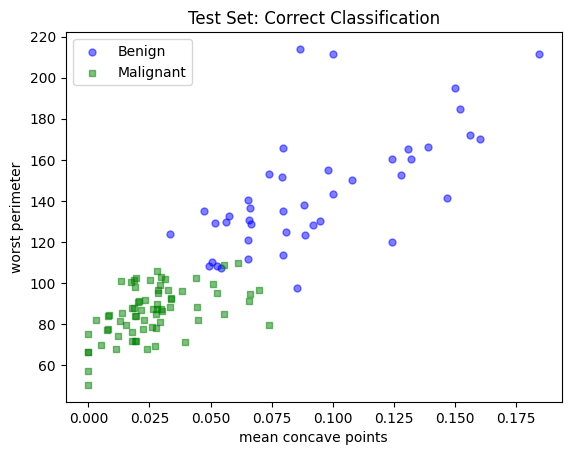

In [6]:
colors = ['blue', 'green']
targets = ['Benign', 'Malignant']
markers = ['o', 's']  

# plot the correctly classified points as filled symbols
for i in range(2):
    plt.scatter(X_test['mean concave points'][y_test == i],
            X_test['worst perimeter'][y_test == i], 
            c = colors[i], 
            label = targets[i], 
            s = 25,
            marker = markers[i],
            alpha = 0.5)
    
plt.legend()
plt.xlabel("mean concave points")
plt.ylabel("worst perimeter")
plt.title("Test Set: Correct Classification");

## Machine learning on two attributes of choice

### Algorithm #1: Nearest Neighbors

In [12]:
# create classifier 
knn = KNeighborsClassifier(n_neighbors=3)

# fit classifier on training data 
knn.fit(X_train, y_train);

# predict on test data 
y_pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


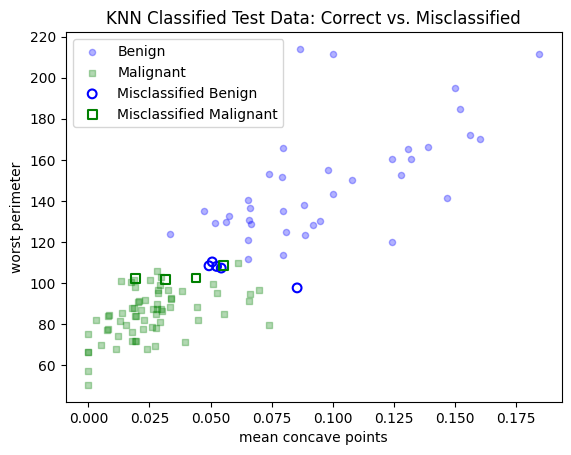

In [32]:
# scatter plot of the KNN classified test data with mistakes as open symbols 
labels = ['Correct', 'Misclassified']

# plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_test[(y_test == y_pred) & (y_test == i)]['mean concave points'], 
                X_test[(y_test == y_pred) & (y_test == i)]['worst perimeter'], 
                color=color, 
                s = 20,
                alpha = 0.3,
                marker=marker, 
                label=target_name)

# plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i)]['mean concave points'],
                X_test[(y_test != y_pred) & (y_test == i)]['worst perimeter'], 
                color=color, 
                marker=marker, 
                facecolors='none', 
                s = 40,
                linewidths=1.5, 
                edgecolors=color, 
                label=labels[1] + ' ' + targets[i])

plt.xlabel("mean concave points")
plt.ylabel("worst perimeter")
plt.legend(loc="best")
plt.title("KNN Classified Test Data: Correct vs. Misclassified");

In [33]:
# get classification report on KNN algorithm 
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



The KNN algorithm trained on the two attributes of interest has a 92% accuracy. We can tell from the plot that the classification is mostly accurate, with some incorrect predictions along the boundary between clusters.

### Algorithm #2: Naive Bayes 

In [34]:
# create a Naive Bayes classifier
gnb = GaussianNB()

# fit classifier to training set
gnb.fit(X_train, y_train)

# make predictions on test set 
y_pred = gnb.predict(X_test)

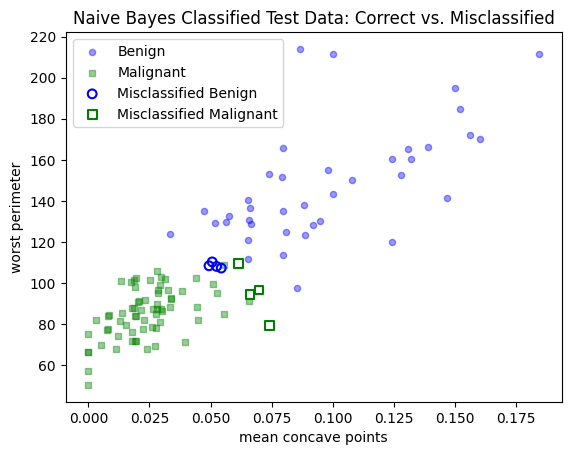

In [35]:
# scatter plot of the Naive Bayes classified test data with mistakes as open symbols

# plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_test[(y_test == y_pred) & (y_test == i)]['mean concave points'], 
                X_test[(y_test == y_pred) & (y_test == i)]['worst perimeter'], 
                color=color, 
                s = 20,
                alpha = 0.4,
                marker=marker, 
                label=target_name)

# plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test[(y_test != y_pred) & (y_test == i)]['mean concave points'],
                X_test[(y_test != y_pred) & (y_test == i)]['worst perimeter'], 
                color=color, 
                marker=marker, 
                facecolors='none', 
                linewidths=1.5, 
                s = 40,
                edgecolors=color, 
                label=labels[1] + ' ' + targets[i])

plt.xlabel("mean concave points")
plt.ylabel("worst perimeter")
plt.legend(loc="best")
plt.title("Naive Bayes Classified Test Data: Correct vs. Misclassified");

In [36]:
# get classification report on Naive Bayes algorithm 
cls_report = classification_report(y_test, y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        43
           1       0.94      0.94      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



The Naive Bayes classification trained on the two attributes of interest has a 93% accuracy. This model performed slightly better on points along the boundary. 

## Principal Component Analysis (PCA)

In [37]:
# perform PCA on whole dataset keeping only the first two principal components
pca = PCA(n_components=2)

# generate new predicted data based on the PCA rotation
X_pca = pca.fit_transform(X_all)

# transform PCA array into dataframe 
df_pca = pd.DataFrame(X_pca, columns = ['PCA1', 'PCA2'])

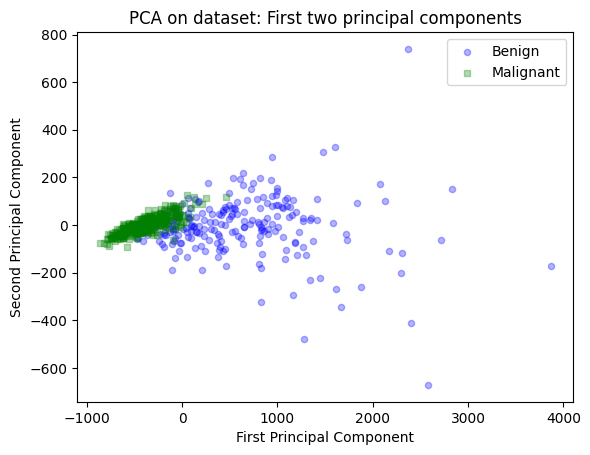

In [38]:
# scatter plot of the first two principal components 
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_pca[y == i, 0], 
                X_pca[y == i, 1], 
                color=color, 
                marker=marker, 
                s = 20,
                alpha = 0.3,
                label=target_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend()
plt.title("PCA on dataset: First two principal components")
plt.show()

In [39]:
# split pca data into training and testing sets 
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, y, test_size=0.2, random_state=42)

/var/folders/8y/9d3sn3bs31q01_vp3wj1dzyw0000gn/T/ipykernel_6230/296894956.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(X_test_pca[y == i]['PCA1'],
/var/folders/8y/9d3sn3bs31q01_vp3wj1dzyw0000gn/T/ipykernel_6230/296894956.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test_pca[y == i]['PCA2'],


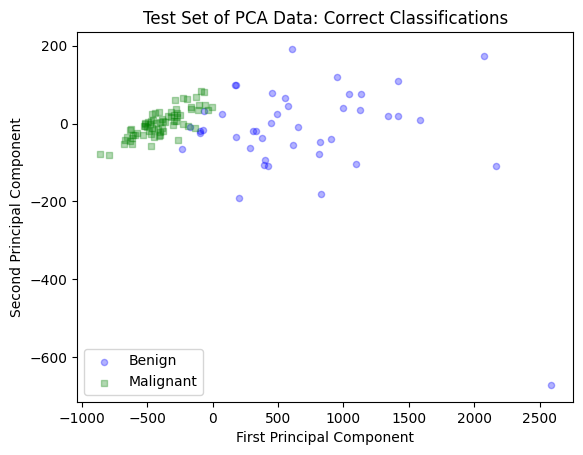

In [40]:
# scatter plot of the first two principal components - testing set 
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_test_pca[y == i]['PCA1'], 
                X_test_pca[y == i]['PCA2'], 
                color=color, 
                marker=marker, 
                s = 20,
                alpha = 0.3,
                label=target_name)

plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc = 'lower left')
plt.title("Test Set of PCA Data: Correct Classifications")
plt.show()

### Algorithm #1: Nearest Neighbors

In [41]:
# create classifier 
knn_pca = KNeighborsClassifier(n_neighbors=3)

# fit classifier on PCA training data 
knn_pca.fit(X_train_pca, y_train_pca)

# predict on PCA test data 
y_pred_pca = knn_pca.predict(X_test_pca)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


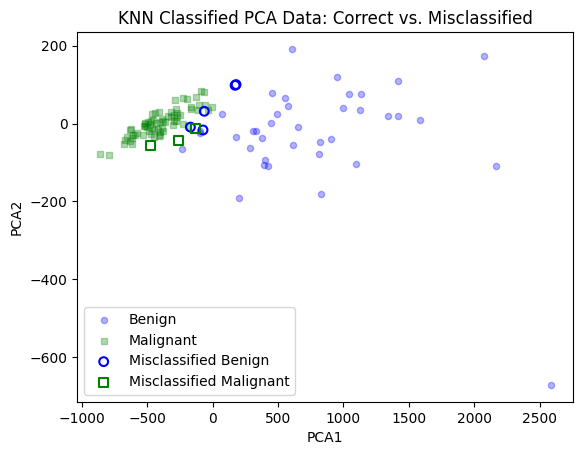

In [42]:
# scatter plot of the KNN trained on PCA data with mistakes as open symbols

# plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_test_pca[(y_test_pca == y_pred_pca) & (y_test_pca == i)]['PCA1'], 
                X_test_pca[(y_test_pca == y_pred_pca) & (y_test_pca == i)]['PCA2'], 
                color=color, 
                s = 20,
                alpha = 0.3,
                marker=marker, 
                label=target_name)

# plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test_pca[(y_test_pca != y_pred_pca) & (y_test_pca == i)]['PCA1'],
                X_test_pca[(y_test_pca != y_pred_pca) & (y_test_pca == i)]['PCA2'], 
                color=color, 
                marker=marker, 
                facecolors='none', 
                s = 40,
                linewidths=1.5, 
                edgecolors=color, 
                label=labels[1] + ' ' + targets[i])

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc="best")
plt.title("KNN Classified PCA Data: Correct vs. Misclassified");

In [43]:
# get classification report on KNN algorithm trained on PCA data
cls_report = classification_report(y_test_pca, y_pred_pca)
print(cls_report)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        43
           1       0.93      0.96      0.94        71

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



The Nearest Neighbors algorithm trained on the PCA data has a 93% accuracy, which is 1 percent higher than the accuracy of the KNN model trained on just the two correlated attributes. This indicates that higher-accuracy models can be made by performing PCA on the whole dataset. 

### Algorithm #2: Naive Bayes

In [44]:
# create a Naive Bayes classifier
gnb_pca = GaussianNB()

# fit classifier to PCA training set
gnb_pca.fit(X_train_pca, y_train_pca)

# make predictions on PCA test set 
y_pred_pca = gnb_pca.predict(X_test_pca)

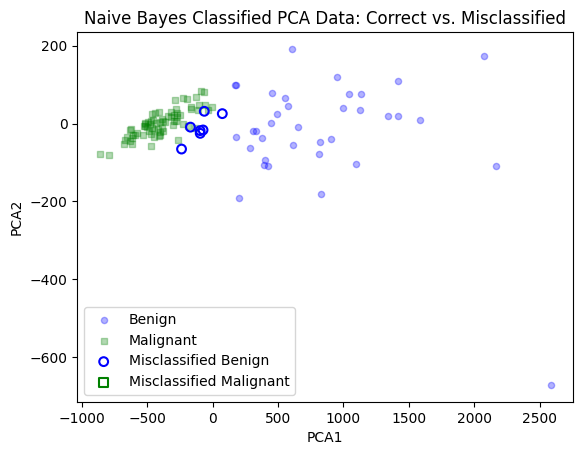

In [45]:
# scatter plot of the Naive Bayes trained on PCA data with mistakes as open symbols

# plot the correctly classified points as filled symbols
for i, color, target_name, marker in zip(range(2), colors, targets, markers):
    plt.scatter(X_test_pca[(y_test_pca == y_pred_pca) & (y_test_pca == i)]['PCA1'], 
                X_test_pca[(y_test_pca == y_pred_pca) & (y_test_pca == i)]['PCA2'], 
                color=color, 
                s = 20,
                alpha = 0.3,
                marker=marker, 
                label=target_name)

# plot the misclassified points as open symbols
for i, color, marker in zip(range(3), colors, markers):
    plt.scatter(X_test_pca[(y_test_pca != y_pred_pca) & (y_test_pca == i)]['PCA1'],
                X_test_pca[(y_test_pca != y_pred_pca) & (y_test_pca == i)]['PCA2'], 
                color=color, 
                marker=marker, 
                facecolors='none', 
                s = 40,
                linewidths=1.5, 
                edgecolors=color, 
                label=labels[1] + ' ' + targets[i])

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(loc="best")
plt.title("Naive Bayes Classified PCA Data: Correct vs. Misclassified");

In [46]:
# get classification report on Naive Bayes algorithm trained on PCA data
cls_report = classification_report(y_test_pca, y_pred_pca)
print(cls_report)

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        43
           1       0.91      1.00      0.95        71

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



The Naive Bayes algorithm trained on the PCA data produced the highest accuracy model at 94%. Overall, the Naive Bayes models performed better than the KNN models, and training on the PCA data further increases their accuracies.

## Conclusion: I would recommend the use of the Naive Bayes algorithm trained on PCA data as the automated screening algorithm for cancer detection. 
- KNN trained on two attributes: 92% accuracy
- Naive Bayes trained on two attributes: 93% accuracy 
- KNN trained on PCA data: 93% accuracy 
- Naive Bayes trained on PCA data: 94% accuracy 